# ft_linear_regression

## The project

This school project is an introduction to machine learning. The goal is to predict the price of a car based on its mileage. The project is divided into two parts: a training part and a prediction part.

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## The algorithm

1. Dataset: $(x, y)$ with $m$ examples, $n$ variables

```math
\begin{equation*}
\begin{matrix}
X = 
\begin{bmatrix} 
x^{(1)}_1 & 1 \\ 
x^{(2)}_1 & 1 \\ 
\vdots & \vdots \\ 
x^{(m)}_1 & 1
\end{bmatrix} \\

m \times (n+1)
\end{matrix}
\end{equation*}

\qquad

\begin{equation*}
\begin{matrix}
Y = 
\begin{bmatrix} 
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)} 
\end{bmatrix} \\
m \times 1
\end{matrix}
\end{equation*}

\qquad

\begin{equation*}
\begin{matrix}
\theta = 
\begin{bmatrix} 
a \\ 
b 
\end{bmatrix} \\

(n + 1) \times 1 
\end{matrix}
\end{equation*}
```

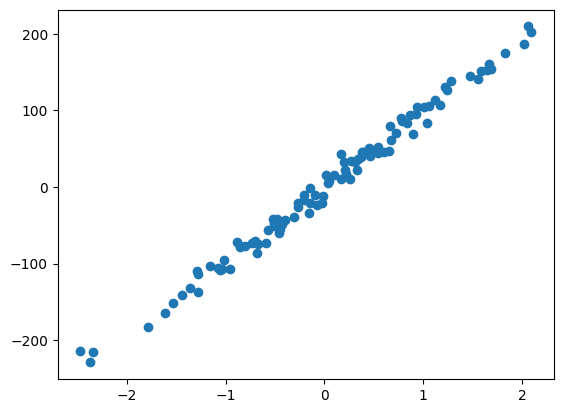

In [2]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y)

In [3]:
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [4]:
# x matrix
X = np.hstack((x, np.ones(x.shape)))
X

array([[-0.15938483,  1.        ],
       [ 0.01557968,  1.        ],
       [-1.28839189,  1.        ],
       [-0.10037129,  1.        ],
       [-0.51083727,  1.        ],
       [-0.85127494,  1.        ],
       [ 0.83677455,  1.        ],
       [ 1.24103037,  1.        ],
       [-1.06006616,  1.        ],
       [ 1.46834795,  1.        ],
       [ 0.89279902,  1.        ],
       [ 1.66615712,  1.        ],
       [ 0.09632239,  1.        ],
       [-0.45016264,  1.        ],
       [ 0.77207272,  1.        ],
       [-2.36873774,  1.        ],
       [ 2.06242343,  1.        ],
       [ 0.60444189,  1.        ],
       [ 0.34070737,  1.        ],
       [-0.14606851,  1.        ],
       [ 0.36896709,  1.        ],
       [ 0.37489558,  1.        ],
       [ 2.09042627,  1.        ],
       [ 0.3935589 ,  1.        ],
       [ 1.28102736,  1.        ],
       [-0.4759196 ,  1.        ],
       [ 0.44837311,  1.        ],
       [-0.26464631,  1.        ],
       [ 1.64591082,

In [5]:
# create theta vector
theta = np.random.randn(2, 1)
theta

array([[ 0.46592451],
       [-1.50612158]])

2. Model:

```math
\begin{equation*}
F = X.\theta
\end{equation*}
\qquad
m \times 1
```

In [6]:
def model(X, theta):
	return X.dot(theta)

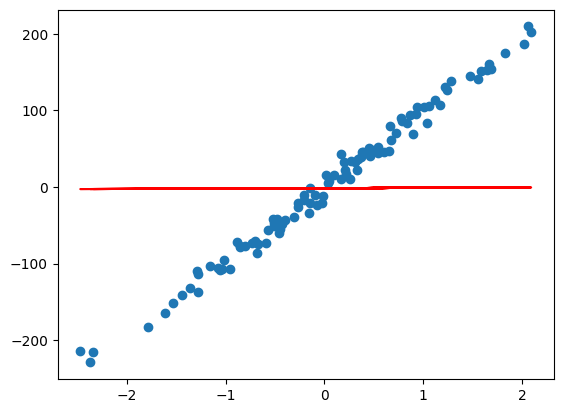

In [7]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

3. Cost function:

```math
\begin{equation*}
J(\theta) = \frac{1}{2m}\sum(X.\theta+Y)^2
\end{equation*}
\qquad
1 \times 1
```

In [8]:
def cost_function(X, y, theta):
	m = len(y)
	return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [9]:
cost_function(X, y, theta)

np.float64(4820.571557896187)

4. Gradients:

```math
\begin{equation*}
\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m} X^T.(X.\theta-Y)
\end{equation*}
\qquad
(n+1) \times 1
```

In [10]:
def grad(X, y, theta):
	m = len(y)
	return 1/m * X.T.dot(model(X, theta) - y) 

5. Gradient Descent Algorithm:

```math
\begin{equation*}
\theta := \theta - \alpha\frac{\partial J(\theta)}{\partial \theta}
\end{equation*}
\qquad
(n+1) \times 1
```



In [11]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):

	cost_history = np.zeros(n_iterations)
	for i in range(0, n_iterations):
		theta = theta - learning_rate * grad(X, y, theta)
		cost_history[i] = cost_function(X, y, theta)
	return theta, cost_history

## Machine Learning


In [12]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [13]:
theta_final

array([[9.67006238e+01],
       [1.15307161e-02]])

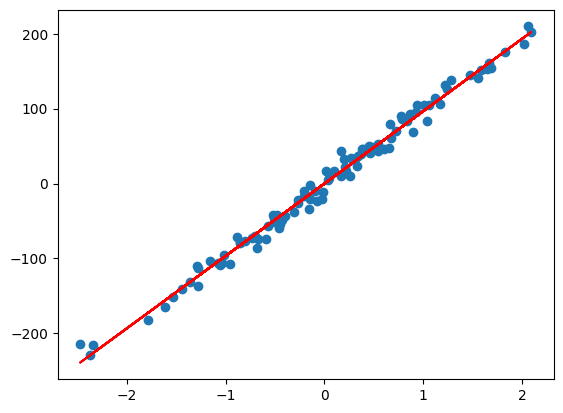

In [14]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

### Learning curve

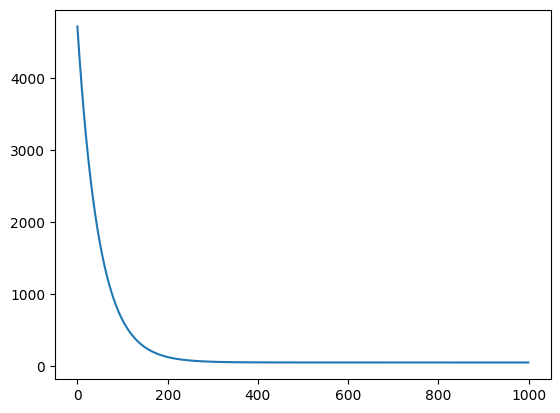

In [15]:
plt.plot(range(1000), cost_history)

### Coefficient of determination

```math
\begin{equation*}
R^2 = 1 - \frac{\sum(Y - f(X))^2}{\sum(Y - \bar{Y})^2}
\end{equation*}

In [16]:
def coef_determination(y, pred):
	u = ((y - pred)**2).sum() # residu de la sommme des carrés
	v = ((y - y.mean())**2).sum() #somme totale des carrés
	return 1 - u/v

In [17]:
coef_determination(y, predictions)

np.float64(0.9900740938753209)

## References

- [La régression linéaire 🇫🇷](https://www.youtube.com/watch?v=wg7-roETbbM&t=27s&ab_channel=MachineLearnia)
- [Regression linéraire Numpy](https://youtu.be/vG6tDQc86Rs?list=PLO_fdPEVlfKqUF5BPKjGSh7aV9aBshrpY)